# Métodos de ensamble

La computadora aprende de una tarea T (var. respuesta), generando un resultado óptimo a partir de uan función de costos L a través de  de experiencia E (var. explicativas). Así, el mejor modelo para E y T es aquel que minimiza la medida $\mathbb{E}$ de L. Esto es: 
$$\mathbb{E}[L](y)\,=\,\int \int L(t,y(X))Pr(t,X)\,=\,\int \int (t-y(X))^2Pr(t,X)$$
El modelo óptimo es tal que $y^*\,=\,\mathbb{E}[t|x].$

Finalmente y es el modelo de regresión, esto es: $y(X,D)=w^{T}X$. Desarrolalndo: 

$$\mathbb{E}[L](y)\,=\,\int \int (t-y(X))^2Pr(t,X)\,=\,\int \int (y(X)-\mathbb{E}[t|x]+\mathbb{E}[t|x]-t)^2Pr(t,X)dXdt$$
Así, integrando sobre $t$:
$$\mathbb{E}[L](y)\,=\,\int \left( (y(X)-\mathbb{E}[t|x])^2+Var[t|X]\right )Pr(X)dX$$

Dentro de la fórmula anterior, el primer componente $\left( (y(X)-\mathbb{E}[t|x] \right)^2$ se refiere al $\textit{Sesgo}$ del modelo, mientras que la varianza se compone de un componente intrínseco y de un componente que se puede controlar dependiedo de la complejidad del modelo (No caer en overfitting). Esto es, necesitamos un modelo que sea suficientemente bueno para reducir el sesgo pero no tan complejo como para caer en overfitting (modelos de regresión: más dimensiones, árboles de decisión: mayor profundidad).

![alt text](u_o_fit.jpg "Title")

¿Qué modelo escoger? Métodos:
- Bootstraping: Generas muestras con reemplazo de tu base de datos y creas un estimador (modelo) para cada una de ellas. Luego los agragas.
- Bagging
- Stacking
- Votos (Promedios de los modelos)

Se puede combinar bootstrapping con árboles de decisión para crear $\textit{random forests}$. Desventaja de bootstraping: 
Sea $\left \{ x_n \right \}_{n=1}^{N}$ una muestra de elementos distintos. Suponer que se toma un elemento con reemplazo a cada paso. Así:
$$Pr(y_{1} \neq x_{k}) = \left(1-\frac{1}{N}\right)$$
continuando infinitamente:
$$Pr(y_{1} \neq x_{k},...,y_{m} \neq x_{k}) = \left(1-\frac{1}{N}\right)^{m}$$
$$$$
Si $m \rightarrow \infty$, $Pr(y_{1} \neq x_{k},...,y_{m} \neq x_{k}) \rightarrow e^{-1} \sim 37\%$. Esto es, se pierde alrededor del 37% de los datos al hacer bootstrapping. Se puede complementar con el método de Votos aunqeu se recomienda empezar con bagging.

$\textbf{Tarea}$: Maximizar la $r^2$ del método de housing con ensamble.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from numpy.random import seed, randn
from sklearn.ensemble import BaggingClassifier

# Ada-Boosting

Consiste en encontrar un modelo final que agrege $M$ modelos iniciales ponderados considerando un error. 

In [10]:
'''
Datos
'''
noise=0.2
X, y = make_moons(100, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,random_state=31415)

In [17]:
'''
Técnica de Boosting
'''
from sklearn.tree import DecisionTreeClassifier
G=[]
alpha,err=[],[]
w=np.ones(len(y))*(1/len(y))#Pesos iniciales
M=20
for m in range(M):
    Gm=DecisionTreeClassifier(max_depth=1,random_state=314)#Propones un modelo
    Gm.fit(X,y,sample_weight=w)
    ypred=Gm.predict(X)
    I=(y!=ypred)*1
    err_m=(I*w).sum()/w.sum()
    alpha_m=np.log((1-err_m)/err_m)
    w=w*np.exp(alpha_m*I)
    G.append(Gm)
    alpha.append(alpha_m)
    err.append(err_m)


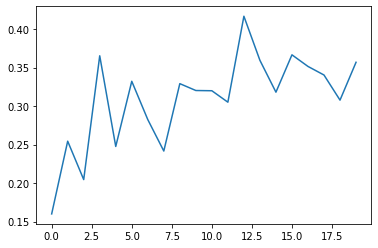

In [20]:
plt.plot(err)

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from plot_classf_model import plot_classf_model

err_trains=[]
err_test=[]
w=np.ones(len(y))*(1/len(y))#Pesos iniciales
M=25
for m in range(1,M+1):
    Gm=DecisionTreeClassifier(max_depth=1,random_state=314)
    G_ada=AdaBoostClassifier(base_estimator=Gm, n_estimators=m, algorithm='SAMME', random_state=314)
    G_ada.fit(X,y)
    ypred_train=G_ada.predict(X)
    ypred_test=G_ada.predict(X_test)
    err_trains.append(accuracy_score(y,ypred_train))
    err_test.append(accuracy_score(y_test,ypred_test))
max(err_test)

0.95

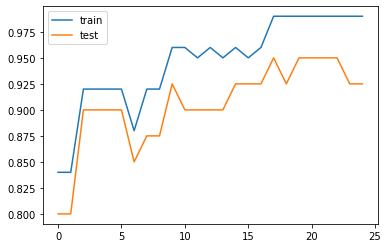

In [42]:
plt.plot(err_trains,label="train")
plt.plot(err_test,label="test")
plt.legend()
plt.show()

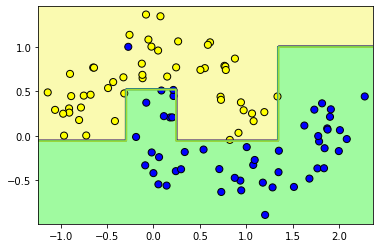

In [43]:
fig,ax=plt.subplots()
plot_classf_model(X,y,G_ada,ax,contour=True)

### Entrenando Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

err_trains_forest=[]
err_test_forest=[]
M=25
for i in range(1,M+1):
    Gm=RandomForestClassifier(n_estimators=i, max_depth=20,random_state=314)
    Gm.fit(X,y)
    ypred_train=Gm.predict(X)
    ypred_test=Gm.predict(X_test)
    err_trains_forest.append(accuracy_score(y,ypred_train))
    err_test_forest.append(accuracy_score(y_test,ypred_test))
imax=err_test_forest.index(max(err_test_forest))

### ¿Cómo cambió pasando de árboles a bosques?

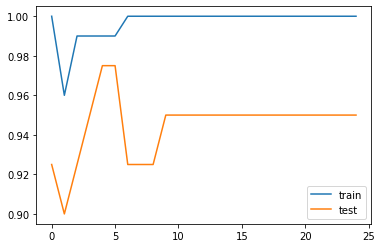

In [69]:
plt.plot(err_trains_forest,label="train")
plt.plot(err_test_forest,label="test")
plt.legend()
plt.show()

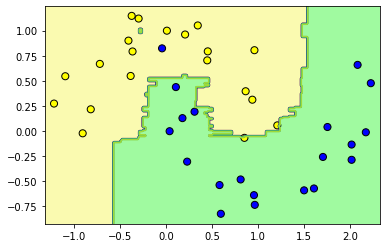

In [70]:
fig,ax=plt.subplots()
plot_classf_model(X_test,y_test,Gm,ax,contour=True)

Bagging: Mientras más complejo sea tu mdoelo, mejor será la precisión. No así con Ada Boosting! (más complejidad podría reducir la precisión con boosting).

In [75]:
'''Bibliografía: 1. The elements of Statistical Learning'''


'Bibliografía: 1. The elements of Statistical Learning'